<a href="https://colab.research.google.com/github/Tavo826/Aprende-ML-Book-/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alquilar o comprar casa

* **estado civil:**
  - 0-soltero
  - 1-casado
  - 2-divorciado

* **trabajo:**
 - 0-sin empleo
 - 1-freelance 
 - 2-empleado
 - 3-empresario
 - 4-pareja: autónomos
 - 5-pareja: empleados
 - 6-pareja: autónomo y asalariado
 - 7-pareja: empresario y autónomo
 - 8-pareja: empresarios o empresario y empleado

* **comprar**
  - 0-No comprar
  - 1-Comprar

Suposiciones:
  - Planteado en euros
  - No se tiene en cuenta ubicación geográfica
  - Hipoteca fija a 30 años con interés de mercado "bajo"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dataframe = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Libro_AprendeML/comprar_alquilar.csv')
dataframe.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1


In [ ]:
print(dataframe.groupby('comprar').size())

comprar
0    135
1     67
dtype: int64


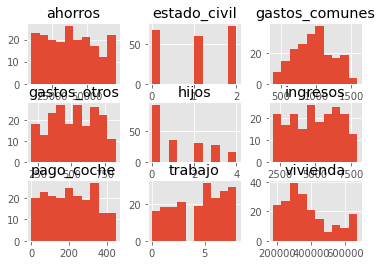

In [ ]:
dataframe.drop(['comprar'], axis=1).hist()
plt.show()

In [ ]:
#Generando más columnas

dataframe['gastos'] = (dataframe['gastos_comunes'] + dataframe['gastos_otros'] + dataframe['pago_coche'])
dataframe['financiar'] = dataframe['vivienda'] - dataframe['ahorros']
reduced = dataframe.drop(['gastos_comunes', 'gastos_otros', 'pago_coche'], axis=1)
reduced.head()

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos,financiar
0,6000,50000,400000,0,2,2,1,1600,350000
1,6745,43240,636897,1,3,6,0,1496,593657
2,6455,57463,321779,2,1,8,1,1926,264316
3,7098,54506,660933,0,0,3,0,1547,606427
4,6167,41512,348932,0,0,3,1,1606,307420


In [ ]:
reduced.describe()

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos,financiar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683,1698.752475,334599.970297
std,1682.862556,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988,324.838005,126607.099497
min,2008.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000,1007.000000,154716.000000
25%,3513.750000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000,1430.500000,240410.250000
50%,4947.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000,1669.500000,301177.000000
75%,6374.500000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000,1928.000000,393413.000000
max,7984.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000,2543.000000,618621.000000


## Selección de características

Se desea seleccionar las 5 mejores características utilizando SelectKBest

In [ ]:
X = dataframe.drop(['comprar'], axis=1)
y = dataframe['comprar']

best = SelectKBest(k=5)
X_new = best.fit_transform(X, y)
print(X_new.shape)

selected = best.get_support(indices=True)
print(X.columns[selected])

(202, 5)
Index(['ingresos', 'ahorros', 'hijos', 'trabajo', 'financiar'], dtype='object')


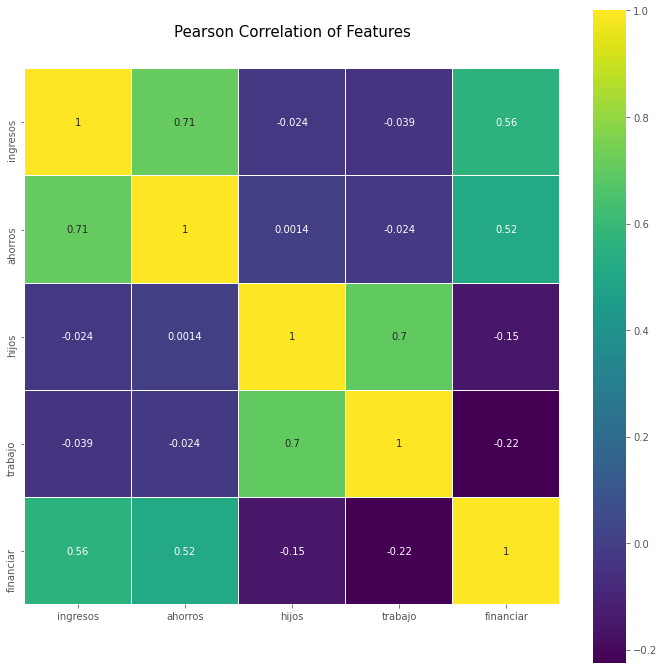

In [ ]:
#Correlación entre las características

used_features = X.columns[selected]

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(dataframe[used_features].astype(float).corr(),
           linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True)


In [ ]:
#Generando el modelo

X_train, X_test = train_test_split(dataframe, test_size=0.2, random_state=6)
y_train = X_train['comprar']
y_test = X_test['comprar']

gnb = GaussianNB()
gnb.fit(X_train[used_features].values, y_train)

y_pred = gnb.predict(X_test[used_features])

print('Precisión en el set de entrenamiento: {:.2f}'.format(gnb.score(X_train[used_features], y_train)))
print('Precisión en el set de test: {:.2f}'.format(gnb.score(X_test[used_features], y_test)))

Precisión en el set de entrenamiento: 0.87
Precisión en el set de test: 0.90


### Probando el modelo

* Familia sin hijos con 2000 euros de ingresos que quiere comprar una casa de 200000 euros y tiene 5000 euros ahorrados

* Familia con 2 hijos con ingresos por 6000 euros al mes, 34000 en ahorros y consultan si compra una casa de 320000

In [ ]:
print(gnb.predict([[2000, 5000, 0, 5, 200000],
                   [6000, 34000, 2, 5, 320000]]))

[0 1]
